### Purpose
The purpose of this lab was to familirize ourselvles with the use of an electromyograph (EMG) to measure electrical data from our muscles as we move them and observing the data in the labarotory software iworx.

### Procedure
. To get things started:
 Before you turn anything on, be sure the IWX/214 unit is plugged in, and that the IWX/214 unit is connected to the laptop by USB cable.
 Be sure that the C-AAMI-504 EEG cable is inserted into the isolated inputs of Channels 1 and 2 of the IWX/214. Be sure that the color-coded lead wires are correctly inserted in the lead pedestal of the C-AAMI-504 EEG cable. Insert the connectors on the electrode lead wires into the color-coded matching sockets on the lead pedestal of the ECG cable.
 Once everything is connected, FIRST turn on the laptop and allow it to fully boot up before you turn on the IWX/214 unit. Once the Iworx unit is on, the red indicator light on the Iworx unit should light up and you may hear the USB chime from the laptop if the laptop does not default to mute (many are set to default to mute).
2. Open the Labscribe3 program by clicking on the Labscribe3 icon on the desktop. As soon as the program opens, you should see a window pop-up that says “Hardware found IWX214:2008-1-24,” click “OK.”  In the second from the top row (the row that says “File Edit View Tools Settings Advanced External Devices Help”), click on the “Settings” tab. About halfway down the drop-down window should be a tab called “Human Muscle.” Click on that tab and that should lead you to another drop-down list with the second tab from the top called “AntagonisticMuscle,” click on that tab and the close the pdf file that appears, you don’t need it.
4. Instruct the subject to remove all jewelry from his/her arm and wrist. Use an alcohol swab to clean the regions of skin on the forearm you are going to use (Fig. 9-1.). Let the area dry. Remove a disposable electrode from its plastic shield, and apply the electrode to the six locations.
5. Place the electrodes from proximal to distal on the forearm in the following order: +2, -2 on the posterior and +1, -1 and ground on the anterior. (Fig. 9-1.) Snap the lead wires onto the electrodes as follows:
 the red “+1” lead is attached to the proximal electrode on the anterior surface.
 the black “-1” lead is attached to the distal electrode on the anterior forearm.
 the green “C” lead (the ground) is attached to the remaining electrode on the anterior surface.
 the white “+2” lead is attached to the proximal electrode on the posterior forearm.
 the brown “-2” lead is attached to the distal electrode on the posterior surface. Record an EMG of the muscles of the forearm illustrating agonistic and antagonistic muscle activity for each of the exercises described below. Type the student’s name and the appropriate letter for the activity (A, B, C, D – see below) in the Mark box to the right of the Mark button. Click the red “Rec” button to begin the recording; then, press the Enter key on the keyboard to mark the beginning of each the activity. The recording for exercise “A” should look like Fig. 9-3. If you do not see anything, try clicking on the AutoScale tab and/or checking the electrode contacts. Repeat these procedures for each of the remaining activities.

A. Gently flex the wrist with the palm open and hold for four seconds. Return the wrist to a neutral position. Extend the wrist, again with the palm open, and hold for four seconds. Repeat several times.
B. Forcefully flex the wrist with the hand closed into a fist, hold for four seconds. Return to a neutral position. Extend the wrist maintaining the fist and hold for four seconds. Repeat several times.
C. Attempt to flex the wrist against resistance applied by another student for 10 seconds.
D. Place the hand in mid-supination and make a fist. Attempt to move the hand upwards against resistance applied by another student. Hold for 10 seconds.
Evaluate the amplitude and frequency of the EMG recordings. Identify the agonists, antagonists and synergists, if applicable, for each activity. For example, what muscles were the agonists during wrist flexion - anterior or posterior forearm muscles? How did the EMG change for the antagonists when the wrist was more forcefully moved? During which exercise(s) did synergistic muscle activity become apparent?
8. Print a sample of each activity. Before you print, find your highest amplitude waves (probably in activity C or D) and AutoScale. Click on the AutoScale tab at the upper margin of each of the EMG channels. Look for the row that says on the left “A1:EMG Anterior (or Posterior) 3-10KHz,” the AutoScale tab is the second icon after “Hz,” it looks like a magnifying glass with a  symbol on it. After you click this for the biggest waves, this is the scale you will print all four activities. To print a section of the recording, click on “File,” select “Print View.” Select “Landscape” for the page set-up. Be sure to select M- 106 as the printer destination.


Results

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv (r'./matt 1.txt', sep = '\t')
df

,Time,EMG,Muscle Force
0,0.000,0.000000,0.268003
1,0.001,0.000000,0.268370
2,0.002,0.000000,0.268003
3,0.003,0.000000,0.268370
4,0.004,0.000000,0.268737
...,...,...,...
60667,60.667,0.073116,0.268370
60668,60.668,-0.092220,0.268003
60669,60.669,-0.181651,0.268003
60670,60.670,0.019578,0.268370


Text(0, 0.5, 'EMG (Volts)')

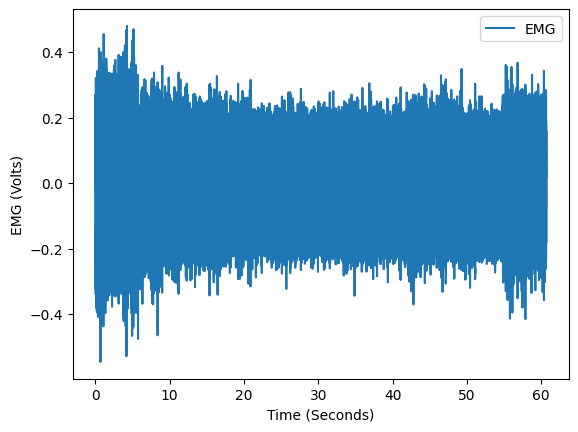

In [ ]:
 fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [ ]:
# Define the parameters
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10  # Step size in seconds (how often you want to check the

In [ ]:
# Initialize lists to store the calculated max values
max_values = []
time_intervals = []

# Iterate through the data in steps
for i in range(0, len(df), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(df):
        window_data = df.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals
result_df = pd.DataFrame({'Time': time_intervals, 'MaxEMG': max_values})

# Calculate the percentage of max EMG for each 0.5 seconds interval
result_df['MaxEMG_percent'] = (result_df['MaxEMG'] / result_df['MaxEMG'].max()) * 100

# Display the result
print(result_df)

      Time    MaxEMG  MaxEMG_percent
0   1.4995  0.454696      100.000000
1  11.4995  0.337304       74.182311
2  21.4995  0.314823       69.238128
3  31.4995  0.280401       61.667796
4  41.4995  0.291862       64.188381
5  51.4995  0.302912       66.618576


In [ ]:
threshold = 70


In [ ]:
reached_threshold = result_df[result_df['MaxEMG_percent'] <= threshold]
time_at_threshold = reached_threshold['Time'].iloc[0]
print(f"Time at ~{threshold} % of max: {time_at_threshold} seconds")

Time at ~70 % of max: 21.4995 seconds


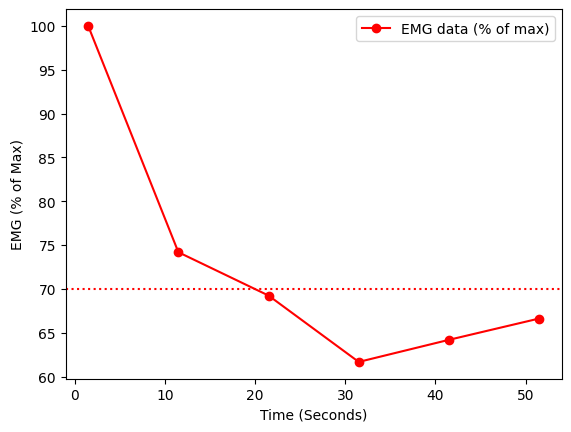

In [ ]:
ig, ax = plt.subplots()
result_df.plot.line(ax = ax, y = 'MaxEMG_percent', x = 'Time', color = 'r', marker = 'o')
L=plt.legend()
L.get_texts()[0].set_text('EMG data (% of max)')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

### Discussion
This lab was easy to complete and yielded interesting data on how much electrical energy is used at a given percentage of how much force our muscles are producing. The data clearly shows the amount of force decreasing over time as the muscles in our forearm were starting to fatigue. Although you can also observe a slight rebound in force after the 30 second mark, however this rebound does not clear the 70% threshold.

### Conclusion
This lab was easy to complete, the most annoying part of it was pulling the electrode pads off of my arms, however that was aided with the use of isopropyl alcohol to dissolve the adhesive. The data gathered all appeared to be within range and indicated that the lab was performed correctly by me and my partner. It was easy to complete this lab report as all of the code was provided by our intstructor to help graph the data in an easy to understand and professional format.